In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/clash/clash_data_consolidated.csv')

In [ ]:
len(df)

920207

In [ ]:
df = df.dropna()

## Sample out data for EDA (Bec the data frame is toooo big!)

In [ ]:
sample_df = df.sample(n=20000,random_state=42)

## Engineer some new features to Explore!

In [ ]:
import ast
sample_df['cards1_dict'] = sample_df['cards1'].apply(lambda x: ast.literal_eval(x))

In [ ]:
sample_df['deck1'] = sample_df['cards1_dict'].apply(lambda x: [a['name'] for a in x])

In [ ]:
sample_df['max_level_1'] = sample_df['cards1_dict'].apply(lambda x: [a['maxLevel'] for a in x])
sample_df['level_1'] = sample_df['cards1_dict'].apply(lambda x: [a['level'] for a in x])

In [ ]:
sample_df['cards2_dict'] = sample_df['cards2'].apply(lambda x: ast.literal_eval(x))
sample_df['deck2'] = sample_df['cards2_dict'].apply(lambda x: [a['name'] for a in x])

In [ ]:

sample_df['max_level_2'] = sample_df['cards2_dict'].apply(lambda x: [a['maxLevel'] for a in x])
sample_df['level_2'] = sample_df['cards2_dict'].apply(lambda x: [a['level'] for a in x])

In [ ]:
sample_df.drop(['cards1','cards2','cards1_dict','cards2_dict'],axis=1,inplace=True)

In [ ]:
def merge(list1, list2):
  merged_list = [(list1[i], list2[i]) for i in range(len(list1))]
  return merged_list

In [ ]:
sample_df['cards_level_1'] = [[x-y+14 for x,y in merge(sample_df['level_1'].iloc[i],sample_df['max_level_1'].iloc[i])] for i in range(len(sample_df))]

In [ ]:
sample_df['cards_level_2'] = [[x-y+14 for x,y in merge(sample_df['level_2'].iloc[i],sample_df['max_level_2'].iloc[i])] for i in range(len(sample_df))]

In [ ]:
sample_df['avg_cards_level_1'] = [sum(x)/8 for x in sample_df['cards_level_1']]
sample_df['avg_cards_level_2'] = [sum(x)/8 for x in sample_df['cards_level_2']]

In [ ]:
sample_df['avg_cards_level_diff'] = sample_df['avg_cards_level_2']-sample_df['avg_cards_level_1']

In [ ]:
sample_df['crowns_won'] = sample_df['crowns2'] - sample_df['crowns1']
sample_df['2_won'] = 0
sample_df['2_won'].loc[sample_df['crowns_won']>0] = 1
sample_df['2_won'].loc[sample_df['crowns_won']<0] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
sample_df.drop(['max_level_1','level_1','max_level_2','level_2','won','cards_level_1','cards_level_2'],axis=1,inplace=True)

# Time to explore!

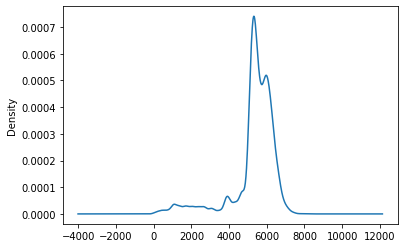

In [ ]:
sample_df['startingTrophies2'].plot.kde(bw_method=0.1)

In [ ]:
sample_df['2_won'].value_counts()/len(sample_df)

0    0.53525
1    0.46475
Name: 2_won, dtype: float64

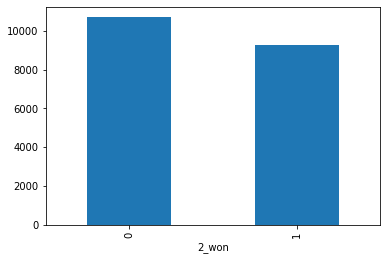

In [ ]:
sample_df.groupby('2_won')['Unnamed: 0'].nunique().plot.bar()

In [ ]:
sample_df['crowns_won'].value_counts()/len(sample_df)

-1.0    0.38575
 1.0    0.32560
-3.0    0.09530
 3.0    0.09130
-2.0    0.05405
 2.0    0.04785
 0.0    0.00015
Name: crowns_won, dtype: float64

In [ ]:
c = sample_df['2_won'].groupby(pd.cut(sample_df["startingTrophies2"], np.arange(0, 9000, 1000))).count()
w = sample_df['2_won'].groupby(pd.cut(sample_df["startingTrophies2"], np.arange(0, 9000, 1000))).mean()
df = pd.concat([c, w], axis=1)
df.set_axis(['match_num', 'win_rate'], axis=1, inplace=True)
df

,match_num,win_rate
startingTrophies2,,
"(0, 1000]",267,0.479401
"(1000, 2000]",633,0.496051
"(2000, 3000]",502,0.430279
"(3000, 4000]",611,0.500818
"(4000, 5000]",1223,0.515127
"(5000, 6000]",11653,0.453360
"(6000, 7000]",4953,0.473249
"(7000, 8000]",156,0.474359


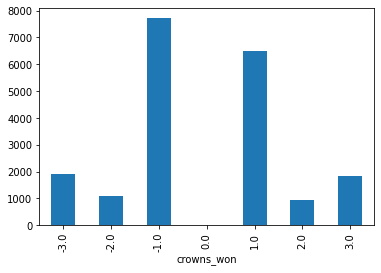

In [ ]:
sample_df.groupby('crowns_won')['Unnamed: 0'].nunique().plot.bar()

In [ ]:
sample_df['avg_cards_level_diff'].describe()

count    20000.000000
mean        -0.041206
std          0.717782
min         -6.750000
25%         -0.375000
50%          0.000000
75%          0.250000
max          4.625000
Name: avg_cards_level_diff, dtype: float64

### Throphies and cards level

In [ ]:
temp['avg_cards_level_diff'].mean()

NameError: ignored

In [ ]:
'Unnamed: 0'
temp = sample_df[['avg_cards_level_diff','startingTrophies2','Unnamed: 0']]
temp['avg_cards_level_diff'] = temp['avg_cards_level_diff'].abs()
a = temp['avg_cards_level_diff'].groupby(pd.cut(temp["startingTrophies2"], np.arange(0, 9000, 1000))).mean()
b = temp['Unnamed: 0'].groupby(pd.cut(temp["startingTrophies2"], np.arange(0, 9000, 1000))).count()
df = pd.concat([a, b], axis=1)
df.set_axis(['players', 'Mean absolute cards level diff'], axis=1, inplace=True)
df

In [ ]:
c = sample_df['avg_cards_level_2'].groupby(pd.cut(sample_df["startingTrophies2"], np.arange(0, 9000, 1000))).count()
m = sample_df['avg_cards_level_2'].groupby(pd.cut(sample_df["startingTrophies2"], np.arange(0, 9000, 1000))).mean()
df = pd.concat([c, m], axis=1)
df.set_axis(['match_num', 'mean_level'], axis=1, inplace=True)
df

,match_num,mean_level
startingTrophies2,,
"(0, 1000]",267,5.917135
"(1000, 2000]",633,7.602686
"(2000, 3000]",502,8.518177
"(3000, 4000]",611,9.190876
"(4000, 5000]",1223,10.075327
"(5000, 6000]",11653,12.844879
"(6000, 7000]",4953,13.932188
"(7000, 8000]",156,13.992788


After 6000 throphies, cards are basically all level 14.  
-->Can sample those for traning model to factor out the effect of cards level (and maybe also playing strategy, since all players are equally good and its not likely to have a strategy advantage)

# Is Clash a fair game?

In [ ]:
len(sample_df.loc[sample_df['startingTrophies2']>6000][['2_won']])

5228

In [ ]:
x = sample_df[['avg_cards_level_diff']]
y = sample_df[['2_won']]
log_reg = sm.Logit(y, x).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.650970
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  2_won   No. Observations:                 1302
Model:                          Logit   Df Residuals:                     1301
Method:                           MLE   Df Model:                            0
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                 0.05316
Time:                        14:45:08   Log-Likelihood:                -847.56
converged:                       True   LL-Null:                       -895.15
Covariance Type:            nonrobust   LLR p-value:                       nan
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
avg_cards_level_diff     0.6785      0.070      9.762      0.000       0.542       0.815
========================================================================================
"""

In [ ]:
sample_df['avg_cards_level_diff'].describe()

count    20000.000000
mean        -0.039675
std          0.725138
min         -5.875000
25%         -0.250000
50%          0.000000
75%          0.250000
max          9.250000
Name: avg_cards_level_diff, dtype: float64

There is a slight correlation between cards level difference and win/lose.  

In [ ]:
c = sample_df.groupby(pd.cut(sample_df["avg_cards_level_diff"], np.arange(-4.5, 4.5, 0.5)))['2_won'].mean()
c

avg_cards_level_diff
(-4.5, -4.0]    0.000000
(-4.0, -3.5]    0.333333
(-3.5, -3.0]    0.068966
(-3.0, -2.5]    0.101449
(-2.5, -2.0]    0.119792
(-2.0, -1.5]    0.208696
(-1.5, -1.0]    0.284007
(-1.0, -0.5]    0.376882
(-0.5, 0.0]     0.442915
(0.0, 0.5]      0.496122
(0.5, 1.0]      0.595619
(1.0, 1.5]      0.701780
(1.5, 2.0]      0.799213
(2.0, 2.5]      0.822430
(2.5, 3.0]      0.840909
(3.0, 3.5]      0.944444
(3.5, 4.0]      1.000000
Name: 2_won, dtype: float64

# What's the meta?

In [ ]:
#Get the full list of cards first
full_list = []
for row in range(len(sample_df)):
  full_list = full_list + sample_df['deck2'].iloc[row]
full_list = list(set(full_list))

In [ ]:
cards_df = pd.DataFrame(index=full_list)

In [ ]:
cards_df['Count'] = 0
for card in cards_df.index:
  count = 0
  for i in range(len(sample_df)):
    if card in sample_df['deck2'].iloc[i]:
      count+=1
  cards_df['Count'][card] = count

In [ ]:
cards_df['wins'] = 0
win_df = sample_df.loc[sample_df['2_won']==1].reset_index()
for card in cards_df.index:
  count = 0
  for i in range(len(win_df)):
    if card in win_df['deck2'].iloc[i]:
      count+=1
  cards_df['wins'][card] = count

In [ ]:
cards_df['win_rate'] = round(cards_df['wins']/cards_df['Count'],2)

In [ ]:
cd = pd.read_excel('/content/drive/My Drive/clash/card_stats.xlsx')
cd.head()

,Unnamed: 0,Card,full_Range,attack_range,attack_radius,attack_speed,speed,instant_air_damage,instant_ground_damage,instant_tower_damage,...,horde_air_damage,horde_ground_damage,horde_tower_damage,individual_hitpoint,horde_hitpoint,building_hitpoint,elixir,Special,category,Detailed Cat.
0,NaN,Heal Spirit,0.0,2.5,2.5,0.0,120,110.0,110.0,110.0,...,0.0,0.0,0.0,231.0,0.0,0.0,1,1,Troop,Spirit
1,NaN,Mirror,0.5,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,Spell,Special
2,NaN,The Log,0.0,10.1,3.9,0.0,120,145.0,145.0,43.5,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,Spell,Spell
3,NaN,Barbarian Barrel,0.0,4.0,2.0,1.0,60,0.0,120.5,0.0,...,0.0,0.0,0.0,335.0,0.0,0.0,2,0,Troop,Brawler
4,NaN,Rage,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,Spell,Special


In [ ]:
pd. set_option('display.max_rows', 20)
cards_df.sort_values(by=['Count'],ascending=False,) #Base win rate: 0.4659

,Count,wins,win_rate
The Log,7302,3307,0.45
Valkyrie,6919,3248,0.47
Fireball,5402,2430,0.45
Skeleton Army,5128,2419,0.47
Mega Knight,4781,2235,0.47
...,...,...,...
Goblin Drill,177,72,0.41
Golden Knight,168,65,0.39
Battle Healer,160,63,0.39
Three Musketeers,155,72,0.46


In [ ]:
cards_df['Category'] = pd.Series()
cards_df['Detail_Category'] = pd.Series()
for card in cards_df.index:
  cards_df['Category'][card] = cd['category'].loc[cd['Card']==card].item()
  cards_df['Detail_Category'][card] = cd['Detailed Cat.'].loc[cd['Card']==card].item()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [ ]:
pd. set_option('display.max_rows', 200)
cards_df

,Count,wins,win_rate,category,Detail_Category,Category
Clone,419,177,0.42,NaN,Special,Spell
Giant Skeleton,677,303,0.45,NaN,Mega brawler,Troop
Goblins,198,69,0.35,NaN,Horde,Troop
Ice Golem,1008,420,0.42,NaN,Tank,Troop
Minions,1528,681,0.45,NaN,Sky horde,Troop
Royal Recruits,266,131,0.49,NaN,Horde,Troop
Fireball,5402,2430,0.45,NaN,Spell,Spell
Battle Ram,664,305,0.46,NaN,Horde charging for tower,Troop
Hog Rider,4556,2074,0.46,NaN,Fast tank,Troop
Bowler,557,250,0.45,NaN,Shooter,Troop


# IS Clash a balanced game?

In [ ]:
#Stats test to see if win rate dist is uniform
random_variables = cards_df['win_rate'].to_numpy()
base_dist = np.linspace(sample_df['2_won'].mean(), sample_df['2_won'].mean(), 106)
stats.ttest_ind(random_variables, base_dist)

Ttest_indResult(statistic=-0.879773242703113, pvalue=0.37998780246024577)

The T test indicates that the win rate of cards follows a uniform distribution.   
-->Clash Royale is a very well balanced game!  
-->Card-level analysis is not good enough for finding winning factor. Should go to deck-level analysis next!

### Run a basket analysis

In [ ]:
def card_in_deck(card,deck):
  if card in deck:
    return 1
  else:
    return 0

In [ ]:
basket_df = sample_df[['startingTrophies2','deck2']]
for card in full_list:
  basket_df[card] = basket_df['deck2'].apply(lambda x: card_in_deck(card,x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Run a basket analysis
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
matches = apriori(basket_df.drop(['startingTrophies2','deck2'],axis=1), min_support=0.07, use_colnames=True)
rules = association_rules(matches, metric="lift", min_threshold=1)

In [ ]:
rules.sort_values(by=['lift'],ascending=False,inplace=True)
rules.reset_index(inplace=True)
rules.head(20).drop([1, 3,5,7,9,11,13,15,17,19]).drop(['index','antecedent support','consequent support'],axis=1)

,antecedents,consequents,support,confidence,lift,leverage,conviction
0,(Goblin Barrel),(Princess),0.08070,0.390704,2.939838,0.053250,1.423119
2,(Ice Spirit),(The Log),0.07060,0.846016,2.346458,0.040512,4.152693
4,(Skeletons),(The Log),0.09740,0.777334,2.155968,0.052223,2.871795
6,(Tesla),(The Log),0.07410,0.639344,1.773247,0.032312,1.773020
8,(Princess),(The Log),0.08030,0.604214,1.675811,0.032383,1.615645
10,(Wizard),(Skeleton Army),0.07595,0.399737,1.597031,0.028393,1.248952
12,(Skeleton Army),(Goblin Barrel),0.08135,0.325010,1.573517,0.029651,1.175499
14,(Electro Wizard),(Zap),0.07525,0.376721,1.562509,0.027090,1.217593
16,(Goblin Barrel),(The Log),0.10525,0.509562,1.413290,0.030778,1.303834
18,(Skeleton Army),(Arrows),0.07445,0.297443,1.368183,0.020035,1.113931


In [ ]:
low_basket_df = basket_df.loc[basket_df['startingTrophies2']<=3000]
matches = apriori(low_basket_df.drop(['startingTrophies2','deck2'],axis=1), min_support=0.07, use_colnames=True)
rules2 = association_rules(matches, metric="lift", min_threshold=1)

rules2.sort_values(by=['lift'],ascending=False,inplace=True)
rules2.reset_index(inplace=True)
rules2.head(20).drop([1, 3,5,7,9,11,13,15,17,19]).drop(['index','antecedent support','consequent support'],axis=1)


,antecedents,consequents,support,confidence,lift,leverage,conviction
0,"(Musketeer, Giant, Knight)","(Archers, Fireball)",0.073475,0.719424,7.306990,0.063420,3.213192
2,"(Giant, Knight)","(Musketeer, Archers, Fireball)",0.073475,0.613497,7.198011,0.063268,2.366782
4,"(Giant, Archers)","(Musketeer, Knight, Fireball)",0.073475,0.793651,7.059861,0.063068,4.301362
6,"(Archers, Fireball)","(Giant, Knight)",0.077884,0.791045,6.604981,0.066092,4.212554
8,"(Giant, Knight, Fireball)","(Musketeer, Archers)",0.073475,0.694444,6.563465,0.062281,2.926458
10,"(Giant, Archers)","(Arrows, Knight)",0.070536,0.761905,6.400941,0.059517,3.700073
12,"(Archers, Knight)","(Musketeer, Giant, Fireball)",0.073475,0.757576,6.325525,0.061860,3.630970
14,"(Archers, Fireball)","(Arrows, Knight)",0.073475,0.746269,6.269578,0.061756,3.472058
16,"(Giant, Knight)","(Musketeer, Archers)",0.078619,0.656442,6.204286,0.065947,2.602747
18,"(Musketeer, Giant, Archers)","(Knight, Fireball)",0.073475,0.862069,6.175136,0.061577,6.237877


In [ ]:
mid_basket_df = basket_df.loc[(basket_df['startingTrophies2']<=6000)&(basket_df['startingTrophies2']>=3000)]
matches = apriori(mid_basket_df.drop(['startingTrophies2','deck2'],axis=1), min_support=0.07, use_colnames=True)
rules3 = association_rules(matches, metric="lift", min_threshold=1)

rules3.sort_values(by=['lift'],ascending=False,inplace=True)
rules3.reset_index(inplace=True)
rules3.head(20).drop([1, 3,5,7,9,11,13,15,17,19]).drop(['index','antecedent support','consequent support'],axis=1)

,antecedents,consequents,support,confidence,lift,leverage,conviction
0,(Princess),(Goblin Barrel),0.083751,0.561265,2.578928,0.051276,1.783229
2,(Ice Spirit),(The Log),0.078148,0.832025,2.149636,0.041794,3.649034
4,(The Log),(Skeletons),0.084193,0.217524,2.001691,0.042132,1.139115
6,(The Log),(Tesla),0.080434,0.207810,1.541131,0.028242,1.092108
8,(Bats),(Mega Knight),0.075789,0.442151,1.528372,0.026201,1.274008
10,(Princess),(The Log),0.087142,0.583992,1.508813,0.029387,1.473400
12,(The Log),(Knight),0.075199,0.194286,1.453553,0.023464,1.075241
14,(Wizard),(Skeleton Army),0.085668,0.354918,1.410106,0.024915,1.160013
16,(Witch),(Mega Knight),0.077927,0.405914,1.403113,0.022388,1.196299
18,(Goblin Barrel),(Skeleton Army),0.076305,0.350610,1.392991,0.021527,1.152318


In [ ]:
high_basket_df = basket_df.loc[basket_df['startingTrophies2']>=6000]
matches = apriori(high_basket_df.drop(['startingTrophies2','deck2'],axis=1), min_support=0.07, use_colnames=True)
rules4 = association_rules(matches, metric="lift", min_threshold=1)

rules4.sort_values(by=['lift'],ascending=False,inplace=True)
rules4.reset_index(inplace=True)
rules4.head(20).drop([1, 3,5,7,9,11,13,15,17,19]).drop(['index','antecedent support','consequent support'],axis=1)

,antecedents,consequents,support,confidence,lift,leverage,conviction
0,(Goblin Barrel),(Princess),0.076066,0.645108,7.125445,0.065390,2.562649
2,(Royal Ghost),(Bandit),0.072155,0.858140,5.774376,0.059659,6.001590
4,(P.E.K.K.A),(Electro Wizard),0.080563,0.729204,4.080029,0.060817,3.032813
6,(Baby Dragon),(Tornado),0.089949,0.659026,3.281653,0.062539,2.343810
8,(Electro Wizard),(Bandit),0.070591,0.394967,2.657713,0.044030,1.407177
10,(Cannon),(The Log),0.072546,0.911548,2.644161,0.045110,7.408079
12,(Hog Rider),(Skeletons),0.072937,0.480670,2.629034,0.045194,1.573506
14,(Barbarian Barrel),(Tornado),0.085843,0.526379,2.621131,0.053093,1.687380
16,(The Log),(Skeletons),0.152914,0.443562,2.426071,0.089884,1.468571
18,(Rocket),(The Log),0.081345,0.832000,2.413413,0.047640,3.900358


# Counter/Synergy analysis

We need more samples for more accurate results!

In [ ]:
#Get the full list of cards first
full_list = []
for row in range(len(sample_df)):
  full_list = full_list + sample_df['deck2'].iloc[row]
full_list = list(set(full_list))

In [ ]:
sample_df2 = df.sample(n=100000,random_state=42)

In [ ]:
import ast
sample_df2['cards1_dict'] = sample_df2['cards1'].apply(lambda x: ast.literal_eval(x))

In [ ]:
sample_df2['deck1'] = sample_df2['cards1_dict'].apply(lambda x: [a['name'] for a in x])

In [ ]:
sample_df2['max_level_1'] = sample_df2['cards1_dict'].apply(lambda x: [a['maxLevel'] for a in x])
sample_df2['level_1'] = sample_df2['cards1_dict'].apply(lambda x: [a['level'] for a in x])

In [ ]:
sample_df2['cards2_dict'] = sample_df2['cards2'].apply(lambda x: ast.literal_eval(x))
sample_df2['deck2'] = sample_df2['cards2_dict'].apply(lambda x: [a['name'] for a in x])

In [ ]:

sample_df2['max_level_2'] = sample_df2['cards2_dict'].apply(lambda x: [a['maxLevel'] for a in x])
sample_df2['level_2'] = sample_df2['cards2_dict'].apply(lambda x: [a['level'] for a in x])

In [ ]:
sample_df2.drop(['cards1','cards2','cards1_dict','cards2_dict'],axis=1,inplace=True)

In [ ]:
def merge(list1, list2):
  merged_list = [(list1[i], list2[i]) for i in range(len(list1))]
  return merged_list

In [ ]:
sample_df2['cards_level_1'] = [[x-y+14 for x,y in merge(sample_df2['level_1'].iloc[i],sample_df2['max_level_1'].iloc[i])] for i in range(len(sample_df2))]

In [ ]:
sample_df2['cards_level_2'] = [[x-y+14 for x,y in merge(sample_df2['level_2'].iloc[i],sample_df2['max_level_2'].iloc[i])] for i in range(len(sample_df2))]

In [ ]:
sample_df2['avg_cards_level_1'] = [sum(x)/8 for x in sample_df2['cards_level_1']]
sample_df2['avg_cards_level_2'] = [sum(x)/8 for x in sample_df2['cards_level_2']]

In [ ]:
sample_df2['avg_cards_level_diff'] = sample_df2['avg_cards_level_2']-sample_df2['avg_cards_level_1']

In [ ]:
sample_df2['crowns_won'] = sample_df2['crowns2'] - sample_df2['crowns1']
sample_df2['2_won'] = 0
sample_df2['2_won'].loc[sample_df2['crowns_won']>0] = 1
sample_df2['2_won'].loc[sample_df2['crowns_won']<0] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
sample_df2.drop(['max_level_1','level_1','max_level_2','level_2','won','cards_level_1','cards_level_2'],axis=1,inplace=True)

In [ ]:
def find_counter_list(champion, champion_list, df):
  #Delete given champion from list to create search list
  search_list = full_list.copy()
  search_list.remove(champion)
  result = pd.DataFrame(columns=['Counter','Match_Count','Win_Count','Win_Rate','Match_Count_B','Win_Count_B','Win_Rate_B'])
  Counter_card = []
  Match_Count = []
  Win_Count = []
  Match_Count_B = []
  Win_Count_B = []
  #for each champion in the search list:
  for counter in search_list:
    wins = 0
    matches = 0
    wins_B = 0
    matches_B = 0
    p2 = df.loc[(df['deck1'].apply(lambda x: (champion in x) & (counter not in x))) & \
           (df['deck2'].apply(lambda x: (counter in x) & (champion not in x)))]
    #Gather data where player 2 has Counter
    wins += len(p2.loc[p2['2_won']==0])
    matches += len(p2)

    p2B = df.loc[(df['deck1'].apply(lambda x: (champion in x) & (counter not in x))) & \
           (df['deck2'].apply(lambda x: (counter not in x) & (champion not in x)))]


    wins_B += len(p2B.loc[p2B['2_won']==0])
    matches_B += len(p2B)

    #Gather data where player 1 has Counter

    p1 = df.loc[(df['deck1'].apply(lambda x: (counter in x) & (champion not in x))) & \
           (df['deck2'].apply(lambda x: (champion in x) & (counter not in x)))]
    
    wins += len(p1.loc[p1['2_won']==1])
    matches += len(p1)


    p1B = df.loc[(df['deck1'].apply(lambda x: (counter not in x) & (champion not in x))) & \
           (df['deck2'].apply(lambda x: (champion in x) & (counter not in x)))]
    

    wins_B += len(p1B.loc[p1B['2_won']==1])
    matches_B += len(p1B)

    #Append to lists 
    Counter_card.append(counter)
    Win_Count.append(wins)
    Match_Count.append(matches)
    Match_Count_B.append(matches_B)
    Win_Count_B.append(wins_B)

  result['Counter'] = Counter_card
  result['Match_Count'] = Match_Count
  result['Win_Count'] = Win_Count
  result['Win_Rate'] = result['Win_Count']/result['Match_Count']

  result['Match_Count_B'] = Match_Count_B
  result['Win_Count_B'] = Win_Count_B
  result['Win_Rate_B'] = result['Win_Count_B']/result['Match_Count_B']

  return result

In [ ]:
def find_synergy_list(champion, champion_list, df):
  #Delete given champion from list to create search list
  search_list = full_list.copy()
  search_list.remove(champion)
  result = pd.DataFrame()
  Synergy_card = []
  Match_Count = []
  Win_Count = []
  Match_Count_B = []
  Win_Count_B = []
  #for each champion in the search list:
  for counter in search_list:
    wins = 0
    matches = 0
    wins_B = 0
    matches_B = 0
    p2 = df.loc[(df['deck1'].apply(lambda x: (champion in x) & (counter in x))) & \
           (df['deck2'].apply(lambda x: (counter not in x) & (champion not in x)))]
    #Gather data where player 2 has Counter
    wins += len(p2.loc[p2['2_won']==0])
    matches += len(p2)

    p2B = df.loc[(df['deck1'].apply(lambda x: (champion in x) & (counter not in x))) & \
           (df['deck2'].apply(lambda x: (counter not in x) & (champion not in x)))]


    wins_B += len(p2B.loc[p2B['2_won']==0])
    matches_B += len(p2B)

    #Gather data where player 1 has Counter

    p1 = df.loc[(df['deck1'].apply(lambda x: (counter not in x) & (champion not in x))) & \
           (df['deck2'].apply(lambda x: (champion in x) & (counter in x)))]
    
    wins += len(p1.loc[p1['2_won']==1])
    matches += len(p1)


    p1B = df.loc[(df['deck1'].apply(lambda x: (counter not in x) & (champion not in x))) & \
           (df['deck2'].apply(lambda x: (champion in x) & (counter not in x)))]
    

    wins_B += len(p1B.loc[p1B['2_won']==1])
    matches_B += len(p1B)

    #Append to lists 
    Synergy_card.append(counter)
    Win_Count.append(wins)
    Match_Count.append(matches)
    Match_Count_B.append(matches_B)
    Win_Count_B.append(wins_B)

  result['Synergy'] = Synergy_card
  result['Match_Count'] = Match_Count
  result['Win_Count'] = Win_Count
  result['Win_Rate'] = result['Win_Count']/result['Match_Count']

  result['Match_Count_B'] = Match_Count_B
  result['Win_Count_B'] = Win_Count_B
  result['Win_Rate_B'] = result['Win_Count_B']/result['Match_Count_B']

  return result

In [ ]:
counter_table = find_counter_list('Golem',full_list, sample_df2)
counter_table['Match_Count_B'] = counter_table['Match_Count']
counter_table['Win_Count_B_f'] = counter_table['Match_Count_B']*counter_table['Win_Rate_B']
counter_table['Win_Count_B'] = round(counter_table['Win_Count_B_f'],0)
counter_table.drop(['Win_Count_B_f'],axis=1,inplace=True)

## Use Chi-Square test of independence to figure out whether the result is statistically significant

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
p_values = []
for champion in list(counter_table['Counter']):
  a = int(counter_table['Win_Count'].loc[counter_table['Counter']==champion])
  b = int(counter_table['Win_Count_B'].loc[counter_table['Counter']==champion])
  c = int(counter_table['Match_Count'].loc[counter_table['Counter']==champion] - counter_table['Win_Count'].loc[counter_table['Counter']==champion])
  d = int(counter_table['Match_Count_B'].loc[counter_table['Counter']==champion] - counter_table['Win_Count_B'].loc[counter_table['Counter']==champion])
  ct = np.array([[a,b], [c,d]])
  if int(c+a) <= 50:
    p_values.append(fisher_exact(ct,alternative='two-sided')[1])    
  else:
    p_values.append(chi2_contingency(ct)[1])
counter_table['P-Value'] = p_values
counter_table.sort_values(by=['P-Value'],ascending=True).loc[counter_table['Win_Rate']<counter_table['Win_Rate_B']]

,Counter,Match_Count,Win_Count,Win_Rate,Match_Count_B,Win_Count_B,Win_Rate_B,P-Value
83,Executioner,321,119,0.370717,321,162.0,0.505703,0.000834
22,P.E.K.K.A,893,389,0.435610,893,457.0,0.511771,0.001498
4,Inferno Tower,562,236,0.419929,562,285.0,0.507576,0.004091
102,Witch,644,285,0.442547,644,329.0,0.510234,0.016444
64,Zap,1302,601,0.461598,1302,658.0,0.505663,0.028091
89,Rage,442,196,0.443439,442,223.0,0.503857,0.079890
88,Tornado,530,233,0.439623,530,262.0,0.494471,0.084746
55,Sparky,259,110,0.424710,259,130.0,0.502028,0.094104
87,Electro Wizard,1284,607,0.472741,1284,650.0,0.506569,0.097323
38,Elite Barbarians,517,235,0.454545,517,261.0,0.504615,0.119658


In [ ]:
Synergy_table = find_synergy_list('Golem',full_list, sample_df2)
Synergy_table['Match_Count_B'] = Synergy_table['Match_Count']
Synergy_table['Win_Count_B_f'] = Synergy_table['Match_Count_B']*Synergy_table['Win_Rate_B']
Synergy_table['Win_Count_B'] = round(Synergy_table['Win_Count_B_f'],0)
Synergy_table.drop(['Win_Count_B_f'],axis=1,inplace=True)

p_values = []
for champion in list(Synergy_table['Synergy']):
  a = int(Synergy_table['Win_Count'].loc[Synergy_table['Synergy']==champion])
  b = int(Synergy_table['Win_Count_B'].loc[Synergy_table['Synergy']==champion])
  c = int(Synergy_table['Match_Count'].loc[Synergy_table['Synergy']==champion] - Synergy_table['Win_Count'].loc[Synergy_table['Synergy']==champion])
  d = int(Synergy_table['Match_Count_B'].loc[Synergy_table['Synergy']==champion] - Synergy_table['Win_Count_B'].loc[Synergy_table['Synergy']==champion])
  ct = np.array([[a,b], [c,d]])
  if int(c+a) <= 50:
    p_values.append(fisher_exact(ct,alternative='two-sided')[1])    
  else:
    p_values.append(chi2_contingency(ct)[1])
Synergy_table['P-Value'] = p_values

,Synergy,Match_Count,Win_Count,Win_Rate,Match_Count_B,Win_Count_B,Win_Rate_B,P-Value
22,P.E.K.K.A,95,30,0.315789,95,49.0,0.511771,0.008060
63,Freeze,81,26,0.320988,81,41.0,0.502412,0.025516
41,Electro Giant,35,9,0.257143,35,18.0,0.501972,0.048557
65,Giant Skeleton,91,33,0.362637,91,46.0,0.502968,0.072706
102,Witch,589,270,0.458404,589,301.0,0.510234,0.080297
...,...,...,...,...,...,...,...,...
14,Cannon,92,45,0.489130,92,46.0,0.496265,1.000000
58,Elixir Golem,32,15,0.468750,32,16.0,0.500224,1.000000
74,Rocket,228,113,0.495614,228,114.0,0.498749,1.000000
54,Goblin Giant,2,1,0.500000,2,1.0,0.500148,1.000000


In [ ]:
Synergy_table.sort_values(by=['P-Value'],ascending=True).loc[Synergy_table['Win_Rate']>Synergy_table['Win_Rate_B']]

,Synergy,Match_Count,Win_Count,Win_Rate,Match_Count_B,Win_Count_B,Win_Rate_B,P-Value
10,Night Witch,3583,1853,0.517164,3583,1727.0,0.482064,0.003144
34,Baby Dragon,2561,1328,0.518547,2561,1253.0,0.489338,0.038638
88,Tornado,1863,984,0.528180,1863,921.0,0.494471,0.042160
2,Bats,750,405,0.540000,750,367.0,0.489303,0.055941
24,Tombstone,460,256,0.556522,460,228.0,0.495533,0.074626
67,Dark Prince,548,300,0.547445,548,270.0,0.493504,0.079539
75,Lumberjack,1702,884,0.519389,1702,836.0,0.491224,0.107130
48,Ice Wizard,246,141,0.573171,246,123.0,0.498160,0.124304
94,Skeleton King,189,109,0.576720,189,94.0,0.496478,0.148702
20,Barbarian Barrel,1265,659,0.520949,1265,622.0,0.491880,0.152272
